# Explore here

In [125]:
# Your code here

import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
sales_data = pd.read_csv(url)

sales_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [126]:
# Check the data types and look for missing values
print(sales_data.info())
print(sales_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None
             sales
count   366.000000
mean    524.963968
std     275.089698
min      53.803211
25%     290.186822
50%     520.699468
75%     763.289263
max    1000.482785


In [127]:
# Load the dataset
df = pd.read_csv(url)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Sort the index if necessary
df.sort_index(inplace=True)

# Display the first few rows
print(df.head())


                                sales
date                                 
2022-09-03 17:10:08.079328  55.292157
2022-09-04 17:10:08.079328  53.803211
2022-09-05 17:10:08.079328  58.141693
2022-09-06 17:10:08.079328  64.530899
2022-09-07 17:10:08.079328  66.013633


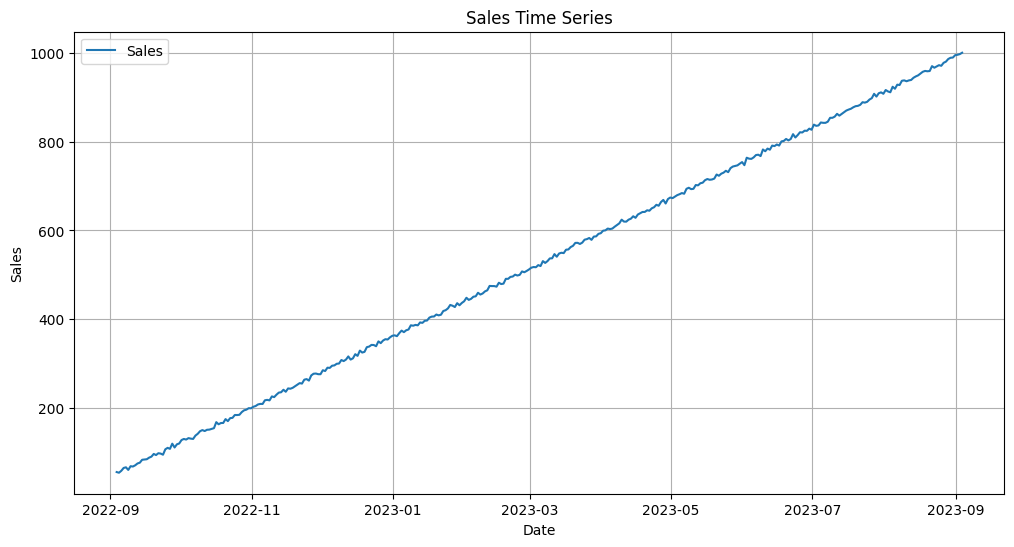

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Sales')
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [129]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


Which is the tensor of the time serie? Daily
Which is the trend? upward trend
Is it stationary? no because p-value greater than 0.05
Is there variability or noise? no, there seems to be steady growth with no outliers

In [130]:
# Perform Augmented Dickey-Fuller test on differenced series
result = adfuller(df['sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


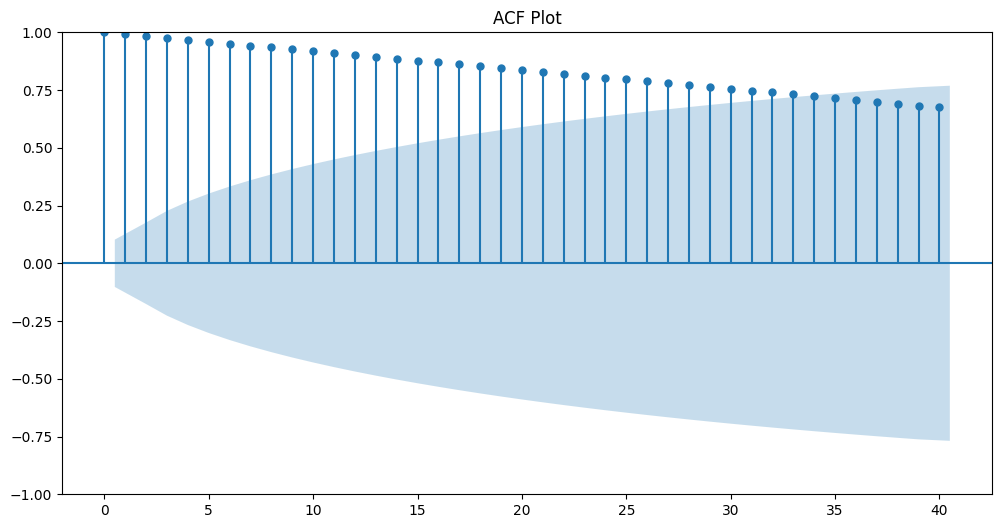

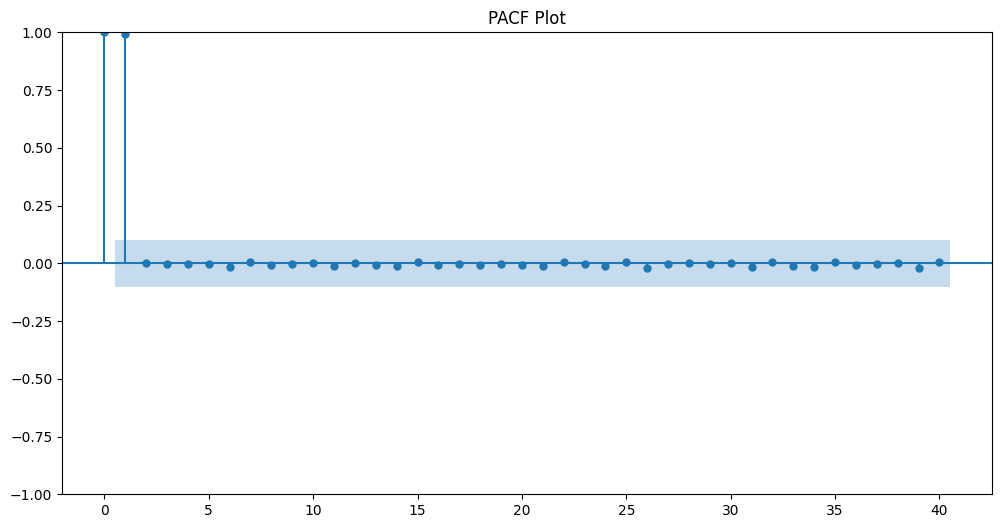

In [131]:
#train ARIMA 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['sales'], ax=plt.gca(), lags=40)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['sales'], ax=plt.gca(), lags=40)
plt.title('PACF Plot')
plt.show()


In [132]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)  

# Extract the sales series for training and testing
train_sales = train_data['sales']
test_sales = test_data['sales']


In [133]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Load your data
df = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Define ARIMA model with example parameters (p, d, q)
p = 1
d = 1
q = 1

model = ARIMA(df['sales'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())




/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.226
Date:                Thu, 15 Aug 2024   AIC                           2104.453
Time:                        03:48:34   BIC                           2116.153
Sample:                    09-03-2022   HQIC                          2109.103
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1194.486      0.000       0.998       1.002
ma.L1         -0.9996      0.679     -1.471      0.141      -2.331       0.332
sigma2        18.1401     12.421      1.460      0.1

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


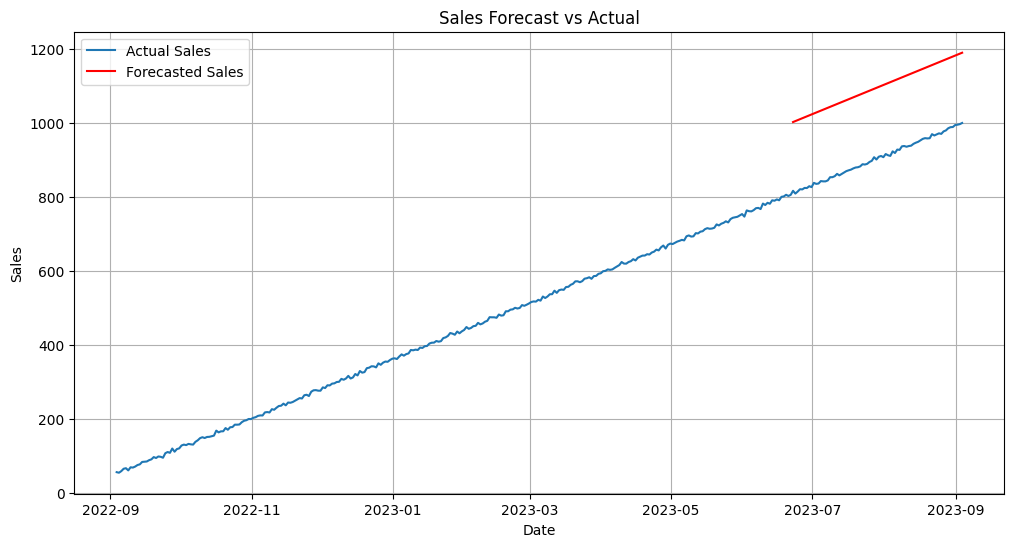

In [134]:
# Forecast
forecast = model_fit.forecast(steps=len(test_data))

# Compare with actual values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Actual Sales')
plt.plot(test_data.index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [135]:
# Forecast using the trained model
forecast = model_fit.forecast(steps=len(test_data))

# Create a DataFrame for the forecast for plotting
forecast_index = test_data.index
forecast_series = pd.Series(forecast, index=forecast_index)


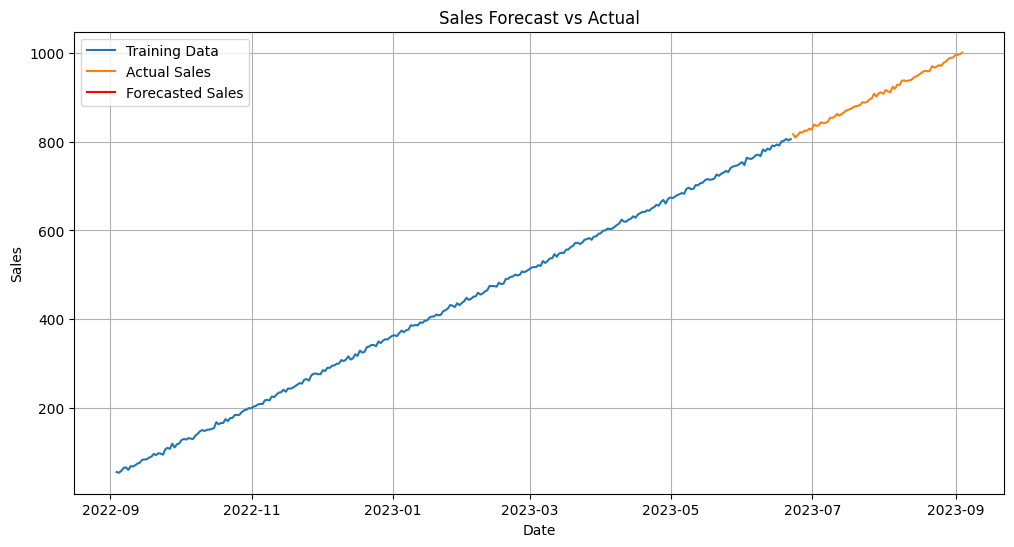

In [136]:
import matplotlib.pyplot as plt

# Plot the actual vs. forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['sales'], label='Training Data')
plt.plot(test_data.index, test_data['sales'], label='Actual Sales')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Sales', color='red')
plt.title('Sales Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [137]:
forecast = model_fit.forecast(60)
forecast


2023-09-04 17:10:08.079328    1003.052927
2023-09-05 17:10:08.079328    1005.623068
2023-09-06 17:10:08.079328    1008.193209
2023-09-07 17:10:08.079328    1010.763350
2023-09-08 17:10:08.079328    1013.333489
2023-09-09 17:10:08.079328    1015.903628
2023-09-10 17:10:08.079328    1018.473766
2023-09-11 17:10:08.079328    1021.043903
2023-09-12 17:10:08.079328    1023.614040
2023-09-13 17:10:08.079328    1026.184176
2023-09-14 17:10:08.079328    1028.754311
2023-09-15 17:10:08.079328    1031.324446
2023-09-16 17:10:08.079328    1033.894580
2023-09-17 17:10:08.079328    1036.464713
2023-09-18 17:10:08.079328    1039.034845
2023-09-19 17:10:08.079328    1041.604977
2023-09-20 17:10:08.079328    1044.175108
2023-09-21 17:10:08.079328    1046.745239
2023-09-22 17:10:08.079328    1049.315368
2023-09-23 17:10:08.079328    1051.885497
2023-09-24 17:10:08.079328    1054.455625
2023-09-25 17:10:08.079328    1057.025753
2023-09-26 17:10:08.079328    1059.595880
2023-09-27 17:10:08.079328    1062

In [138]:
# Forecast using the trained model
forecast = model_fit.forecast(steps=len(test_data))

# Ensure that forecast and test_data lengths match
print("Adjusted Length of forecast:", len(forecast))


Adjusted Length of forecast: 74


In [139]:
print("Length of test_data:", len(test_data))
print("Length of forecast:", len(forecast))


Length of test_data: 74
Length of forecast: 74


In [143]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Convert your data to a numpy array if it's in a DataFrame
y = df['sales'].values

# Define the number of splits
tscv = TimeSeriesSplit(n_splits=5)

# Store results for each split
mse_list = []
mae_list = []
r2_list = []

for train_index, test_index in tscv.split(y):
    # Split the data
    train, test = y[train_index], y[test_index]
    
    # Define and fit the ARIMA model
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=len(test))
    
    # Calculate metrics
    mse = mean_squared_error(test, forecast)
    mae = mean_absolute_error(test, forecast)
    r2 = r2_score(test, forecast)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

# Print the average metrics across all folds
print(f'Average Mean Squared Error: {np.mean(mse_list)}')
print(f'Average Mean Absolute Error: {np.mean(mae_list)}')
print(f'Average R-squared: {np.mean(r2_list)}')


/home/vscode/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Average Mean Squared Error: 52.01994283598526
Average Mean Absolute Error: 5.659671639823673
Average R-squared: 0.9757689084461141


In [144]:
import pickle

# Save the model
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)